# Variational MC solution of the Schroedinger Equation

Here we are going to investigate a solution to the Schroedinger equation using variational MC. Here we will look at the quantum harmonic oscillator. 

### Compile and import

In [ ]:
! swig -c++ -python swig/vmc.i
! python swig/setup_vmc.py build_ext --inplace

In [20]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

### Set up and run the simulation

In [21]:
import vmc
import numpy as np
import matplotlib.pyplot as plt

In [22]:
N=10 
alpha=0.2
MCSteps=10000
  
qho = vmc.QHO(N, alpha, MCSteps)
qho.adjustStep()
qho.doProductionSteps()
qho.normPsi()

 Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 2.32506
 Performing 10000 production steps ...

### Plot the wavefunction

In [23]:
x_min = qho.getXMin()
x_max = qho.getXMax()
dx = qho.getDx()
x_vals = np.arange(x_min, x_max, dx)
psi = np.sqrt(np.abs(qho.getPsiSquared()))

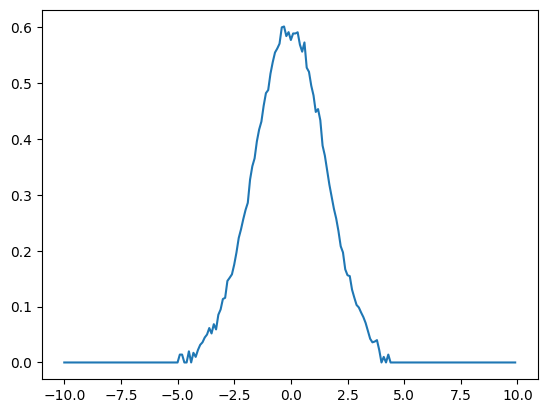

In [24]:
plt.plot(x_vals, psi)
plt.show()

## Run for a few values of alpha to find the minimum

In [27]:
alphas = np.linspace(0.2, 0.8, 13) #([0.2, 0.4, 0.5, 0.6, 0.8])
E_avg_vals = np.zeros(len(alphas))
E_var_vals = np.zeros(len(alphas))
for i, alpha in enumerate(alphas):
    print(f"\nRunning alpha={alpha:.1f}")
    N=10 
    MCSteps=10000
      
    qho = vmc.QHO(N, alpha, MCSteps)
    qho.adjustStep()
    qho.doProductionSteps()
    qho.normPsi()

    E_avg_vals[i] = qho.getEAvg()
    E_var_vals[i] = qho.getEVariance()
print("Done")


Running alpha=0.2

Running alpha=0.2
 Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 2.32989
 Performing 10000 production steps ... Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 2.04458
 Performing 10000 production steps ...
Running alpha=0.3
 Performing 2000 thermalization steps ...
Running alpha=0.4

Running alpha=0.4

 Adjusted Gaussian step size = 1.83634
 Performing 10000 production steps ...
Running alpha=0.5

Running alpha=0.5
 Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 1.67712
 Performing 10000 production steps ... Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 1.61007
 Performing 10000 production steps ... Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 1.50311
 Performing 10000 production steps ... Performing 2000 thermalization steps ...
 Adjusted Gaussian step size = 1.38091
 Performing 10000 production steps ...
Running alpha=0.6

Running alpha=

Text(0, 0.5, '$\\sigma_E^2$')

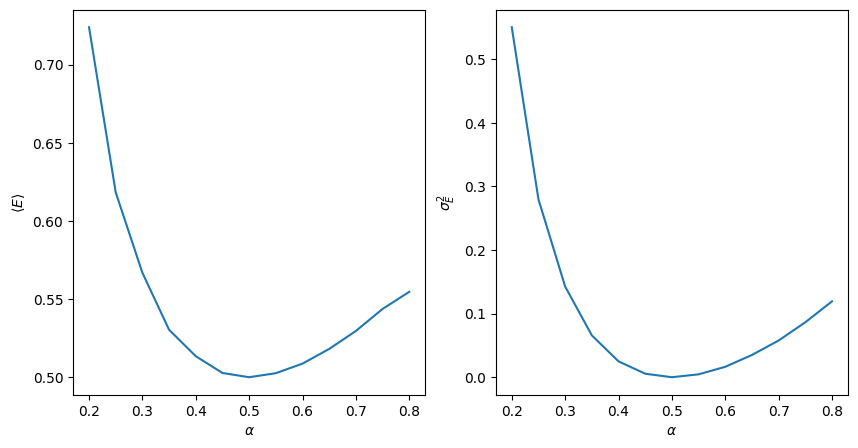

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(alphas, E_avg_vals)
axs[0].set_xlabel(r"$\alpha$")
axs[0].set_ylabel(r"$\langle E \rangle$")
axs[1].plot(alphas, E_var_vals)
axs[1].set_xlabel(r"$\alpha$")
axs[1].set_ylabel(r"$\sigma_E^2$")